In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import boxcox
from scipy.special import inv_boxcox
import numpy as np

from statsmodels.tsa.stattools import adfuller

In [3]:
rotina = 'Rotina_01'
coluna = 'TempoMinutos'

In [74]:
# Monta DataFrame somente com as informações que interessam para o estudo
df = pd.read_excel('DataFrame_Processos_Percentual_Base_CompletaAjusteOutLiers.xlsx')
df = df.loc[df['Processo']==rotina]

# Cria Dataframe somente com as colunas que interessam
df = pd.DataFrame(df, columns = ['DiaInicio', coluna])

df.Dtinicio = pd.to_datetime(df.DiaInicio)
df.set_index('DiaInicio', inplace=True)

df.head()

C:\Users\Michael\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,TempoMinutos
DiaInicio,
2021-01-05,139
2021-01-06,101
2021-01-07,114
2021-01-08,112
2021-01-09,138


In [ ]:
*********************************************************************************
# Transformação BOX COX
*********************************************************************************

In [75]:
#perform Box-Cox transformation on original data
transformed_data, best_lambda = boxcox(df[coluna]) 

In [88]:
transformed_data[1]

13.319660743048615

In [77]:
best_lambda

0.399567430190976

In [78]:
inv_boxcox(transformed_data[1], best_lambda)

101.00000000000003

In [79]:
df[coluna][1]

101

In [80]:
inv_boxcox(transformed_data, best_lambda)

array([139., 101., 114., 112., 138., 120., 120., 171.,  82.,  92.,  79.,
        82.,  83.,  83., 116.,  84.,  68.,  79.,  72.,  83.,  83.,  99.,
        81.,  78.,  64., 120.,  88.,  88., 120.,  64.,  78.,  75., 147.,
        96.,  96., 175.,  91.,  90.,  90.,  87., 106., 106., 106., 106.,
       136.,  57.,  95.,  96.,  96., 116.,  78., 100.,  66., 109.,  94.,
        94., 150.,  84., 111., 108., 139., 118., 118., 155., 128.,  93.,
        62.,  57.,  99.,  99., 121., 155.,  64.,  61.,  68.,  94.,  94.,
        94.,  65.,  57., 137., 106.,  91.,  91.,  75.,  83., 107., 111.,
        94.,  94.,  94., 172., 129., 244., 163., 173., 176., 176., 183.,
       133., 114., 147., 116., 139., 139., 198., 185., 191., 119., 111.,
       115., 115., 216., 152., 100., 141., 227., 167., 167., 115., 167.,
       133., 158., 143., 143., 143., 130., 157., 135., 130., 144., 139.,
       139., 163., 112., 120., 154., 141., 139., 139., 172.,  94., 127.,
       116.,  98., 121., 121., 190., 179., 140., 17

In [11]:
df

,TempoMinutos
DiaInicio,
2021-01-05,139
2021-01-06,101
2021-01-07,114
2021-01-08,112
2021-01-09,138
...,...
2021-12-25,188
2021-12-26,156
2021-12-27,132


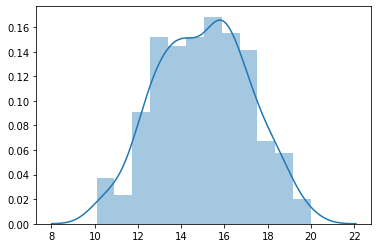

In [81]:
# plot the distribution of the transformed data values
sns.distplot(transformed_data, hist=True, kde=True)

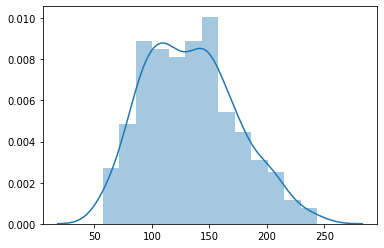

In [13]:
# Original
sns.distplot(df, hist=True, kde=True)

In [ ]:
*********************************************************************************
# Histograma
*********************************************************************************

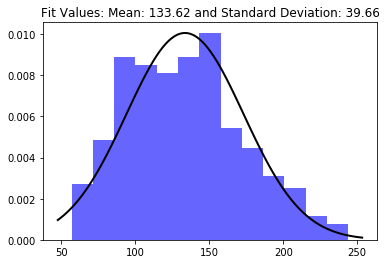

In [14]:
from scipy.stats import norm
 
# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(df) 
  
# Plot the histogram.
plt.hist(df[coluna], bins=13, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: Mean: {:.2f} and Standard Deviation: {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()


In [ ]:
*********************************************************************************
# Augmented Dickey-Fuller
*********************************************************************************

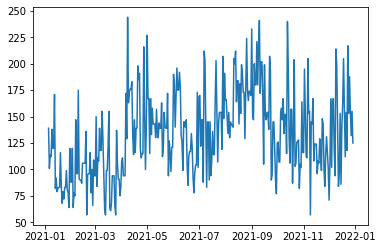

In [15]:
# Exemplo não estacionário
plt.plot(df)


In [16]:
# ADF Statistic - sem log
X = df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.682064
p-value: 0.077194
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [ ]:
Here’s how to interpret the most important values in the output:

Test statistic: -2.682
P-value: 0.077193708
Since the p-value is not less than .05, we fail to reject the null hypothesis.

Isso significa que a série temporal não está estacionária. Em outras palavras, tem alguma 
estrutura dependente do tempo e não tem variância constante ao longo do tempo.

Teste Augmented Dickey-Fuller
p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [17]:
# ADF Statistic - com log
X = df.values
X = np.log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.581104
p-value: 0.096966
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [18]:
# BOX COX
X = pd.DataFrame(transformed_data).values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.615926
p-value: 0.089750
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [91]:
# BOX COX com diferenciação
X = pd.DataFrame(transformed_data)
X = X.diff(periods=1).dropna()
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.168283
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


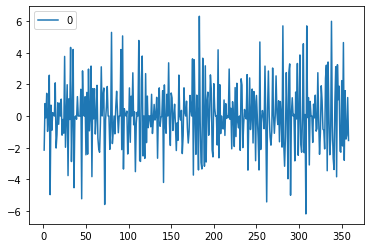

In [34]:
X.plot()

In [94]:
# Exemplo - retornar diferenciação

In [95]:
def diff_inv(series_diff, first_value):
    series_inverted = np.r_[first_value, series_diff].cumsum().astype('float64')
    return series_inverted

In [96]:
df_diff = df.diff().dropna()

In [99]:
df_diff

,TempoMinutos
DiaInicio,
2021-01-06,-38.0
2021-01-07,13.0
2021-01-08,-2.0
2021-01-09,26.0
2021-01-10,-18.0
...,...
2021-12-25,35.0
2021-12-26,-32.0
2021-12-27,-24.0


In [97]:
inversed_series = diff_inv(df_diff[coluna] , df[coluna][0])

In [98]:
inversed_series

array([139., 101., 114., 112., 138., 120., 120., 171.,  82.,  92.,  79.,
        82.,  83.,  83., 116.,  84.,  68.,  79.,  72.,  83.,  83.,  99.,
        81.,  78.,  64., 120.,  88.,  88., 120.,  64.,  78.,  75., 147.,
        96.,  96., 175.,  91.,  90.,  90.,  87., 106., 106., 106., 106.,
       136.,  57.,  95.,  96.,  96., 116.,  78., 100.,  66., 109.,  94.,
        94., 150.,  84., 111., 108., 139., 118., 118., 155., 128.,  93.,
        62.,  57.,  99.,  99., 121., 155.,  64.,  61.,  68.,  94.,  94.,
        94.,  65.,  57., 137., 106.,  91.,  91.,  75.,  83., 107., 111.,
        94.,  94.,  94., 172., 129., 244., 163., 173., 176., 176., 183.,
       133., 114., 147., 116., 139., 139., 198., 185., 191., 119., 111.,
       115., 115., 216., 152., 100., 141., 227., 167., 167., 115., 167.,
       133., 158., 143., 143., 143., 130., 157., 135., 130., 144., 139.,
       139., 163., 112., 120., 154., 141., 139., 139., 172.,  94., 127.,
       116.,  98., 121., 121., 190., 179., 140., 17

In [100]:
df

,TempoMinutos
DiaInicio,
2021-01-05,139
2021-01-06,101
2021-01-07,114
2021-01-08,112
2021-01-09,138
...,...
2021-12-25,188
2021-12-26,156
2021-12-27,132


In [ ]:
*** ROTEIRO
******************************************************************************************
# Nem com LOG e BOXCOX passou no teste de Dickey Furley
******************************************************************************************

# Efetuar diferenciações

# Sugiro estudar o fluxo proposto por Box e Jenkins (1976): 
# 1:Plotar a série e examinar; 
# 2: Diferenciar a série até ficar estacionária e fazer transformações, se necessário; 
# 3: Usar séries diferenciadas para definir p e q; 
# 4: Implementar o Arima nos dados originais; 
# 5: Checar se é um bom modelo; 
# 6: Usar o modelo para fazer previsões.